# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of many samples of iris flowers. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [2]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Display the DataFrame
print(iris_df)

# Your code here...
print(f'There are {iris_df.shape[0]} observations (rows) and {iris_df.shape[1]} features (columns) in this dataset.')


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
There are 150 observations (rows) and 4 

#### **Question 2:** 
#### Data-visualization

Let's create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


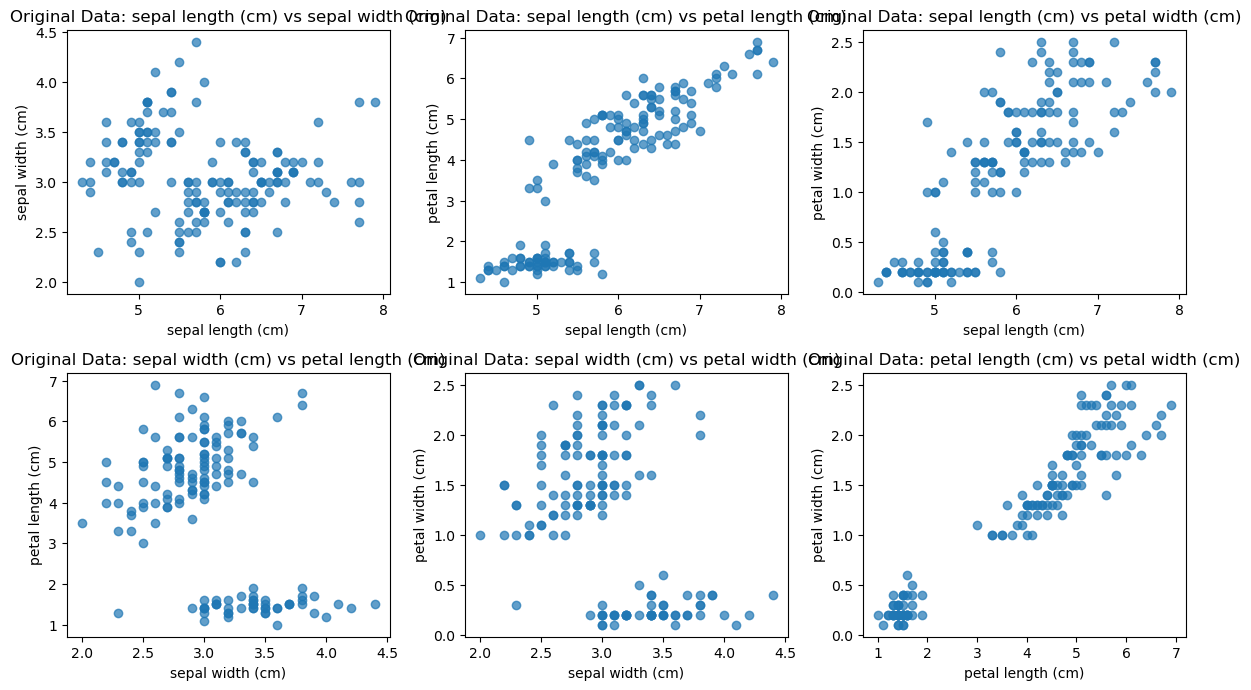

In [3]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(12, 10))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = iris_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(iris_df, feature_names, title_prefix='Original Data: ')

**Question:**
- Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?

> Your answer...<br><br>
> The scatter plots show that some features, like petal length and petal width, have clear groups. This means that these features can help tell the species apart better than others. <br> <br> Petal dimensions have more distinct clusters, meaning that they are good indicators for differentiating between various iris types.<br><br> Features like sepal length and sepal width also show some patterns, but the groups are less separate, making it harder to differentiate species using only these features.


#### **Question 3:** 
#### Data cleaning

In [4]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(iris_df)

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

> Your answer here ... <br><br> 
> Standardizing means adjusting the values of the features so they all have a similar scale, usually with a mean of zero and a standard deviation of one. <br><br> According to the lesson slides on Clustering​, standardizing helps ensure that no single feature dominates the distance calculations used by K-Means. If the features aren't standardized, variables with larger ranges can unfairly influence the clustering results, causing clusters to form based on those features alone. By standardizing, we make sure each feature contributes equally to the clustering process.

#### **Question 4:** 
#### K-means clustering 

Apply the K-Means clustering algorithm to the Iris dataset. Choose the value 3 for the number of clusters (`k=3`) and fit the model. Assign cluster labels to the original data and add them as a new column in the DataFrame.

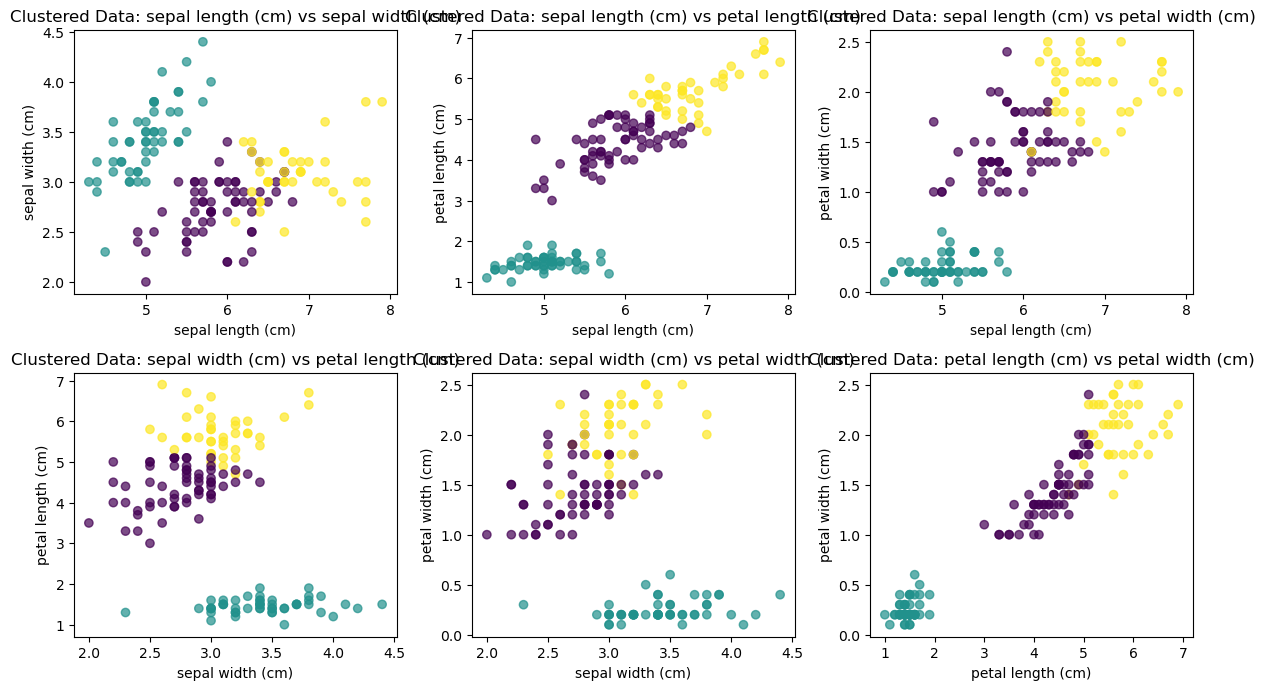

In [5]:
# Your answer...
#Ignore these two lines please, I took a solution from Stackoverflow for a warning I was getting on Windows. Holly suggested it is not a big issue.
import os
os.environ["OMP_NUM_THREADS"] = '1' 

#Creating a KMeans clustering model with 3 clusters
kmeans = KMeans(n_clusters=3)

#creating a copy of the original dataset to make sure that we are not mistakenly changing anything in the original dataset. Just a precaution.
clustered_iris_data = iris_df.copy()

#Fitting the KMeans to the dataset and assigning each data point to one of the 3 clusters. Also, adding Cluster as a new column in the copied dataset.
clustered_iris_data['Cluster'] = kmeans.fit_predict(iris_df)


# Use the helper function to plot scatter plots, colored by cluster labels
plot_feature_pairs(clustered_iris_data, feature_names, color_labels=clustered_iris_data['Cluster'], title_prefix='Clustered Data: ')

We chose `k=3` for the number of clusters arbitrarily. However, in a real-world scenario, it is important to determine the optimal number of clusters using appropriate methods.

**Question**: What is one method commonly used to determine the optimal number of clusters in K-means clustering, and why is this method helpful?

> Your answer here...<br><br>
> The elbow method is a simple way to find the best number of clusters. <br><br>This method involves plotting the within-cluster sum of squared distances (WSSD) against different values of 'k', which is the number of clusters​. The WSSD measures how close the data points in each cluster are to the cluster's center.<br><br>As we increase the number of clusters, the WSSD decreases because the clusters become smaller, and data points are closer to their cluster centers. The elbow method finds the point where the decrease in WSSD slows down significantly, forming an "elbow" shape on the plot. <br><br>This point indicates that adding more clusters beyond this number does not lead to a substantial improvement in clustering quality. Which helps us in identifying what a good balance is between having too few and too many clusters.

#### **Question 5:** 
#### Bootstrapping 

Implement bootstrapping on the mean of Petal Width. Generate 10000 bootstrap samples, calculate the mean for each sample, and compute a 90% confidence interval.

In [6]:
# Your answer here...

#setting the random seed to 123
np.random.seed(123)

#Step 1: Generating 10,000 bootstrap samples for the mean petal width.
#Step 2: Taking a replacement from the original petal width column for each bootstrapped sample.
#Step 3: Calculating the mean of a new sample size for each bootstrapped sample. It is usually the same size as the original dataset.
#Step 4: Storing the results in 'bootstrap_means' list.
bootstrap_means = [np.mean(np.random.choice(iris_df['petal width (cm)'], size=len(iris_df), replace=True)) for _ in range(10000)]

#Calculating the mean of all bootstrapped sample means. This gives us an estimate mean for the population.
mean_petal_width = np.mean(bootstrap_means)

#Calculating the 90% confidence interval for the mean using 5th and 95th percentile for lower and upper bounds of the bootstrapped distribution.
lower_bound = np.percentile(bootstrap_means, 5)
upper_bound = np.percentile(bootstrap_means, 95)

# Display the result rounded to 2 decimal places.
print(f"Mean of Petal Width: {mean_petal_width:.2f}")
print(f"90% Confidence Interval of Mean Petal Width: ({lower_bound:.2f}, {upper_bound:.2f})")

Mean of Petal Width: 1.20
90% Confidence Interval of Mean Petal Width: (1.10, 1.30)


**Question:**
- Why do we use bootstrapping in this context? What does it help us understand about the mean?

>  Your answer...<br><br>
> Bootstrapping is a technique for estimating how a statistic, like the mean, might be different if we have different samples. Bootstrapping involves taking many samples with replacement from the original data to create a "bootstrap distribution"​. This approach helps us understand the variability of the mean by approximating the sampling distribution without needing access to the whole population. It gives us a way to see how much the mean might change if we collected new samples.<br><br> In this assignment, bootstrapping helps us see how much the mean of petal width might change and it gives us an idea about the stability and reliability of our estimate.

**Question:**
- What is the purpose of calculating the confidence interval from the bootstrap samples? How does it help us interpret the variability of the estimate?

> Your answer...<br><br>
> The confidence interval provides a range of values that likely contains the true mean of a given population. AIt is calculated by finding the percentiles of the bootstrap distribution, which helps show the uncertainty around an estimate​. For example, a 90% confidence interval means we are 90% confident that the true mean falls within this range. It helps us understand how precise our estimate is.<br><br> In this assignment, the 90% confidence interval for the mean petal width (1.10, 1.30) means that we are 90% confident that the true mean lies within this range.

**Question:**

- Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the Petal Width appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

> Your answer here...<br><br>
> If the bootstrapped means have a narrow spread and the confidence interval is not too wide, it indicates that the mean of Petal Width is likely a stable estimate. A narrow range indicates consistency across different bootstrap samples, meaning that our estimate is reliable​. If the spread is wide, it would suggest more variability in the mean, making the estimate less stable.<br><br>In this assignment, given that the 90% of confidence interval for the mean petal width is 1.10, 1.30 and the mean is 1.20 - the interval is relatively narrow, indicating that our estimate is reliable and stable. 

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [x] Created a branch with the correct naming convention.
- [x] Ensured that the repository is public.
- [x] Reviewed the PR description guidelines and adhered to them.
- [x] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
